# Time Series Analysis
- objectives
1. Gather Data Order total amounts by Month 
2. Gather Number of Items for each order grouped by Month

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates

In [6]:
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('data/olist_order_payments_dataset.csv')
print(order_items.head(2))
print(order_payments.head(2))

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  


In [7]:
#Getting Order total payment values and grouping by date
order_sales = pd.merge(orders, order_payments, on='order_id')

#exploring the dataframe we have created
#print(order_sales.head(2))
#print(order_sales.dtypes)


#converting
order_sales['order_purchase_timestamp'] = pd.to_datetime(order_sales['order_purchase_timestamp'])
order_sales_date = order_sales
order_sales_time = order_sales
print(order_sales.head())

#Grouping sales for each date
order_sales_date['order_purchase_timestamp'] = order_sales_date['order_purchase_timestamp'].dt.date
order_sales_time['order_purchase_timestamp'] = order_sales_time['order_purchase_timestamp']

print(order_sales_date.head(2))
print(order_sales_date.dtypes)

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

                          payment_value
order_purchase_timestamp               
2017-11-24                    179200.03
Index(['payment_value'], dtype='object')


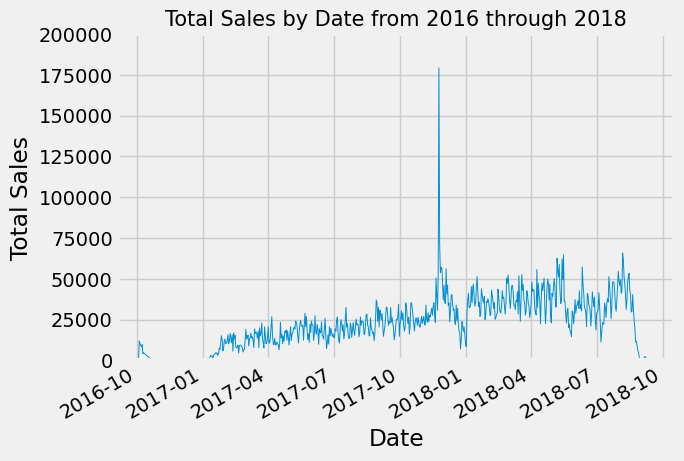

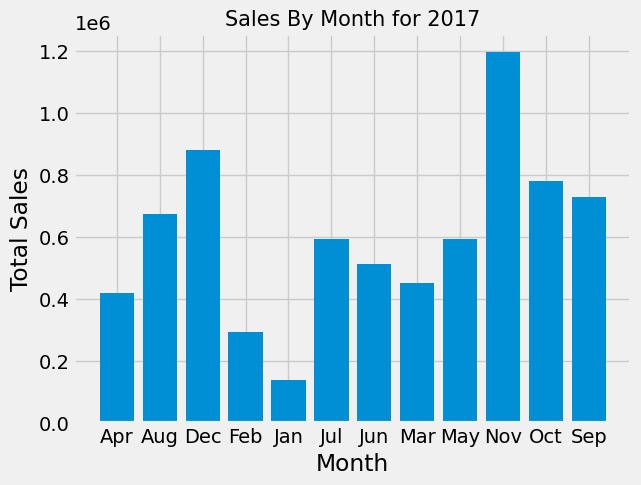

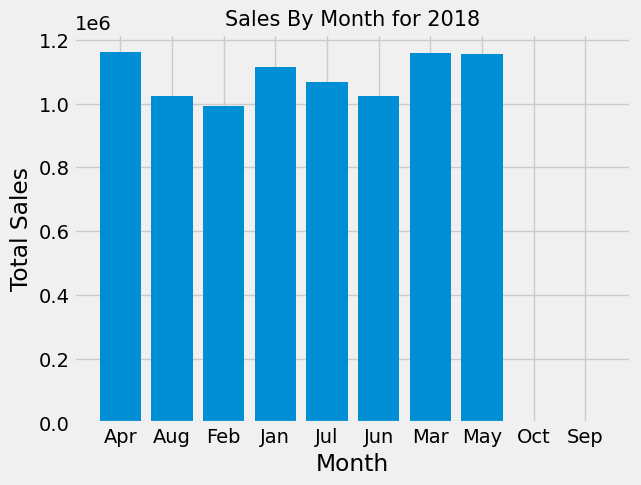

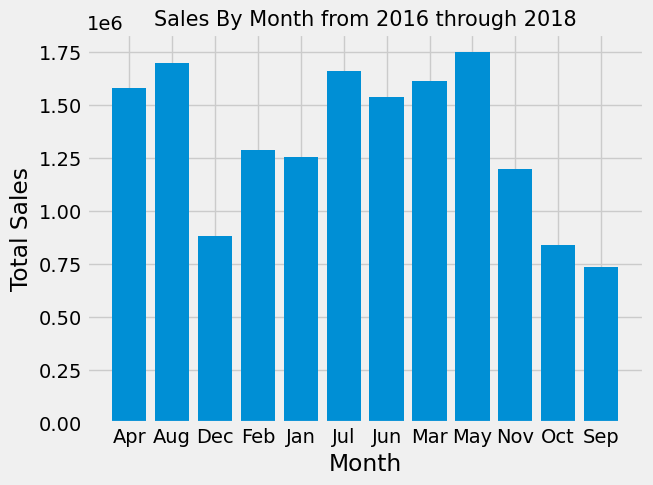

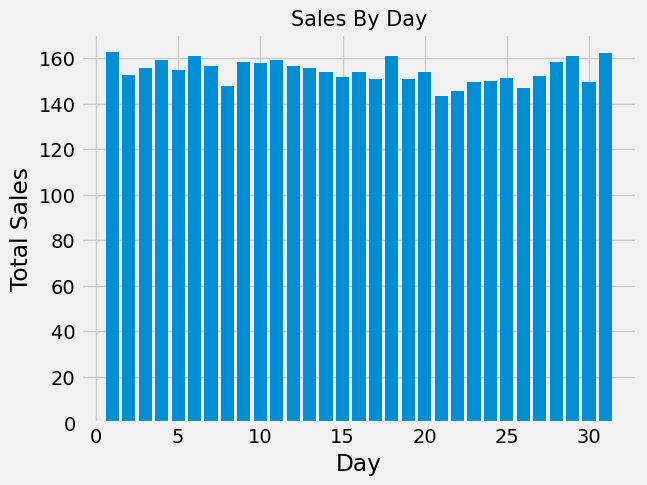

In [27]:
# DailySales Visualizations
order_sales_date['order_purchase_timestamp'] = pd.to_datetime(order_sales_date['order_purchase_timestamp'])
order_sales_date['order_purchase_timestamp'] = order_sales_date['order_purchase_timestamp'].dt.date
DailySales = pd.DataFrame(order_sales_date.groupby('order_purchase_timestamp')['payment_value'].sum())
print(DailySales[DailySales['payment_value'] == DailySales['payment_value'].max()])
print(DailySales.columns)

plt.style.use('fivethirtyeight')
#print(DailySales)
import datetime
fig,ax1 = plt.subplots()
ax1.plot(DailySales.index, DailySales['payment_value'], linewidth=.7)
fig.autofmt_xdate()
ax1.set_xlim([DailySales.index.min(), DailySales.index.max()])
ax1.set_ylim([0, 200000])
plt.title("Total Sales by Date from 2016 through 2018", fontsize = 15)
plt.ylabel("Total Sales")
plt.xlabel("Date")
plt.show()




# Monthly Sales Visualizations
order_sales_month = order_sales

order_sales_month['order_purchase_timestamp'] = pd.to_datetime(order_sales_month['order_purchase_timestamp'])
order_sales_month['order_purchase_month'] =  (order_sales_month['order_purchase_timestamp'].dt.month)
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
order_sales_month = order_sales_month.replace({'order_purchase_month' : monthDict})
order_sales_month['order_purchase_year'] =  (order_sales_month['order_purchase_timestamp'].dt.year)
order_sales_month['order_purchase_day'] =  (order_sales_month['order_purchase_timestamp'].dt.day)

#print(order_sales_month['order_purchase_month'].value_counts())

# Monthly Sales Visualizations By Year
order_sales_byMonth_2017 = order_sales_month[order_sales_month['order_purchase_year'] == 2017].groupby('order_purchase_month')['payment_value'].sum()
order_sales_byMonth_2017 = pd.DataFrame(order_sales_byMonth_2017)
plt.bar(order_sales_byMonth_2017.index, order_sales_byMonth_2017['payment_value'])
plt.title("Sales By Month for 2017", fontsize = 15)
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

order_sales_byMonth_2018 = order_sales_month[order_sales_month['order_purchase_year'] == 2018].groupby('order_purchase_month')['payment_value'].sum()
order_sales_byMonth_2018 = pd.DataFrame(order_sales_byMonth_2018)
plt.bar(order_sales_byMonth_2018.index, order_sales_byMonth_2018['payment_value'])
plt.title("Sales By Month for 2018", fontsize = 15)
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

# Monthly Sales Visualizations Total
order_sales_byMonth = order_sales_month.groupby('order_purchase_month')['payment_value'].sum()
order_sales_byMonth= pd.DataFrame(order_sales_byMonth)
plt.bar(order_sales_byMonth.index, order_sales_byMonth['payment_value'])
plt.title("Sales By Month from 2016 through 2018", fontsize = 15)
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.show()

# Day Sales Visualizations Total
order_sales_byDay = order_sales_month.groupby('order_purchase_day')['payment_value'].mean()
order_sales_byDay= pd.DataFrame(order_sales_byDay)
plt.bar(order_sales_byDay.index, order_sales_byDay['payment_value'])
plt.title("Sales By Day", fontsize = 15)
plt.ylabel("Total Sales")
plt.xlabel("Day")
plt.show()



